## Scikit-learn 선형회귀 (1)

라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error

<br>

#### 데이터 전처리

미국 보스턴 주의 주택가격 관련 요인들

In [2]:
df_data = pd.read_excel('data/boston_house_data.xlsx', index_col=0, encoding='utf-8') # 엑셀 파일 읽기
df_data.head() 

0     1     2   3      4      5     6       7   8    9     10      11  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296  15.3  396.90   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242  17.8  396.90   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242  17.8  392.83   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222  18.7  394.63   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222  18.7  396.90   

     12  
0  4.98  
1  9.14  
2  4.03  
3  2.94  
4  5.33

#### df_data (Data, x)

0. 범죄율
1. 25,000 평방피트를 초과하는 거주지역 비율
2. 비소매상업지역 면적 비율 
3. 찰스강의 경계에 위치한 경우는 1, 아니면 0
4. 일산화질소 농도
5. 주택당 방 수 (거실 외 subroom)
6. 1940년 이전에 건축된 주택의 비율
7. 직업센터의 거리
8. 방사형 고속도로까지의 거리
9. 재산세율
10. 학생/교사 비율
11. 인구 중 흑인 비율
12. 인구 중 하위 계층 비율

주택 가격의 중앙값

In [7]:
df_target = pd.read_excel('data/boston_house_target.xlsx', index_col=0, encoding='utf-8') # 인덱스열 지정
df_target.head()

0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

#### df_target (Target, y)
- Town 내 주택 가격의 중앙값 (단위 : $1,000)

features & target 합치기

In [9]:
df_main = pd.concat([df_data, df_target], axis = 1) # 열 방향으로(옆으로) 연결
df_main.head()

0     1     2   3      4      5     6       7   8    9     10      11  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296  15.3  396.90   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242  17.8  396.90   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242  17.8  392.83   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222  18.7  394.63   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222  18.7  396.90   

     12    0   
0  4.98  24.0  
1  9.14  21.6  
2  4.03  34.7  
3  2.94  33.4  
4  5.33  36.2

열 이름 변경

In [10]:
df_main.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] 
df_main.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

#### Feature Normalization(scaling)


- Numeric(Continuous) 연속
    - Min-Max Algorithm
    - Standardization
    
    <br>
- Categorical(Discontinuous) 비연속, 범주형
    - One-hot encoder -> 하나의 범주형 열을 범주 개수 만큼 열을 추가하여 1, 0으로 표현

In [11]:
df_data[8].value_counts(sort=False).keys()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 24], dtype='int64')

-> one-hot encoder

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 24 | <br>
| 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | -> one-hot vector <br>
| 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | <br>
| 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | <br>
| 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | <br>

<br>

DataFrame -> Numpy array

In [12]:
boston_data = np.array(df_data)
boston_target = np.array(df_target)

Numpy array -> DataFrame

In [13]:
pd.DataFrame(boston_data).head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

array 차원수 확인

In [16]:
boston_data.shape # 506개의 data, 13개의 data features

(506, 13)

In [15]:
boston_target.shape

(506, 1)

<br>

#### 기본 제공 데이터셋 이용

In [35]:
boston = datasets.load_boston()

In [36]:
boston.target[:100]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2])

In [37]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [39]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<br>

#### feature 선택

기본 데이터셋 boston 이용할 경우

In [44]:
type(boston.data)

numpy.ndarray

In [62]:
boston_X = boston.data[:, 12:13]
boston_Y = boston.target

엑셀로 받아온 데이터프레임->np.array 이용

In [52]:
boston_X = boston_data[:, 12:13] # 12열 - 인구 중 하위 계층 비율
boston_X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [53]:
boston_Y = boston_target
boston_Y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

<br>

#### Training & Test set

In [54]:
# train 70% / test 30%
# random_state (random_seed or seed) : make the result reproducible 랜덤의 패턴 - 패턴을 지닌 랜덤
x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 1)
(152, 1)
(354, 1)
(152, 1)


<br>

#### Scikit-learn linear model

비어있는 모델

In [56]:
model = linear_model.LinearRegression() # 선형회귀

모델 객체 학습 (training)

In [57]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

y = a * x + b

In [58]:
print('Coefficients: ', model.coef_) # a, 계수

Coefficients:  [[-0.96814078]]


In [59]:
print('Intercepts: ', model.intercept_) # b, 교차점

Intercepts:  [34.78978059]


y = (-0.96814078) * x + 34.78978059

<br>

#### 모델 테스트

train 데이터 예측

In [60]:
model.predict(x_train)

array([[ 1.47605623],
       [27.30605233],
       [18.3701129 ],
       [29.9781209 ],
       [17.43101634],
       [16.66618512],
       [22.11681773],
       [14.43946132],
       [ 9.18245687],
       [24.85665615],
       [30.34601439],
       [29.70704148],
       [26.99624728],
       [22.40725997],
       [27.33509656],
       [27.79980413],
       [27.24796389],
       [18.96067878],
       [30.54932396],
       [10.67339367],
       [20.60651811],
       [29.46500628],
       [21.87478254],
       [13.70367433],
       [20.17085476],
       [14.32328443],
       [23.50125906],
       [25.660213  ],
       [19.07685567],
       [20.73237641],
       [25.30200091],
       [23.52062187],
       [16.72427357],
       [29.87162541],
       [25.59244315],
       [28.9906173 ],
       [30.4815541 ],
       [19.08653708],
       [11.5737646 ],
       [23.89819678],
       [29.27137812],
       [23.65616158],
       [31.73045571],
       [28.77762633],
       [25.59244315],
       [21

x_train 데이터에 대한 모델 예측값 -> MSE 계산

In [61]:
mean_squared_error(model.predict(x_train), y_train)

37.93397817288029

In [27]:
# (예측값(x_train) - 실제값(y_train))^2
print('MSE(Training data) : ', np.mean((model.predict(x_train) - y_train) ** 2))

MSE(Training data) :  37.93397817288029


In [46]:
print('MSE(Training data) : ', mean_squared_error(model.predict(x_train), y_train))

MSE(Training data) :  1.546423843884179


test 데이터 예측

In [29]:
model.predict(x_test)

array([[27.68362724],
       [25.56339892],
       [24.62430236],
       [15.6496373 ],
       [22.84292332],
       [26.58962815],
       [23.70456862],
       [25.79575271],
       [22.55248109],
       [24.49844406],
       [14.82671764],
       [14.24583316],
       [17.56655605],
       [ 7.41075923],
       [32.93095029],
       [30.20079328],
       [24.39194858],
       [30.83976619],
       [29.62959021],
       [26.29918592],
       [27.81916695],
       [23.14304697],
       [21.14867695],
       [27.82884836],
       [24.90506319],
       [21.88446395],
       [21.40039355],
       [19.50283762],
       [30.71390789],
       [18.2442546 ],
       [17.33420226],
       [20.55811107],
       [24.96315164],
       [22.78483488],
       [26.03778791],
       [20.61619952],
       [ 8.87265182],
       [26.19269043],
       [17.71177717],
       [11.45758771],
       [26.48313267],
       [21.0905885 ],
       [25.98938087],
       [17.22770678],
       [26.41536281],
       [25

x_test 데이터에 대한 모델 예측값 -> MSE 계산

In [30]:
print('MSE(Test data) : ', mean_squared_error(model.predict(x_test), y_test))

MSE(Test data) :  39.81715050474417


In [31]:
np.sqrt( mean_squared_error(model.predict(x_test), y_test) ) # 제곱근

6.310083240714355

#### -> 선형 회귀는 성능을 기대하기엔 아쉬움

<br>

#### 모델 시각화

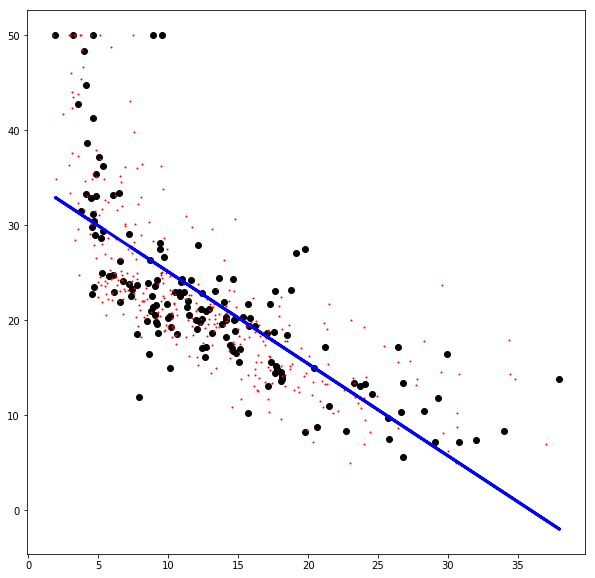

In [32]:
plt.figure(figsize=(10, 10))

plt.scatter(x_test, y_test, color="black") # Test data
plt.scatter(x_train, y_train, color="red", s=1) # Train data, s(size)

plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line

plt.show()

<br>

++ 추가)

### GradientBoostingRegressor

In [34]:
from sklearn import model_selection, linear_model, ensemble
from sklearn.metrics import mean_squared_error

# 1. Prepare the data (array!)
boston_data = np.array(df_data)
boston_target = np.array(df_target)

# 2. Feature selection
boston_X = boston_data[:, 5:13] 
boston_Y = boston_target

# 3. Train/Test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)

# 4. Create model object 
model = ensemble.GradientBoostingRegressor()

# 5. Train the model 
model.fit(x_train, y_train)

# 6. Test the model
print('MSE(Training data) : ', mean_squared_error(model.predict(x_train), y_train))
print('MSE(Test data) : ', mean_squared_error(model.predict(x_test), y_test))

MSE(Training data) :  1.546423843884179
MSE(Test data) :  14.851513785000018


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
